# Link utilizado para pegar as cotações das moedas:https://docs.awesomeapi.com.br/api-de-moedas#legendas


# Importando Bibliotecas utilizadas no projeto

In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Solicitando as informações ao usuário de qual moeda fazer a cotação

In [36]:
cotacao_moeda = str(input('Qual moeda fazer cotação: '))

Qual moeda fazer cotação: USD
Pegar cotação de quantos dias anteriores: 30
Data de inicio: 20210306
Data final: 20220306


# Solicitando as informações ao usuário de quantos dias anteriores fazer a cotação do BID

In [ ]:
cotacoes_anteriores = int(input('Pegar cotação de quantos dias anteriores: '))

# Solicitando as informações ao usuário de qual determinado tempo fazer a cotação do BID

In [ ]:
data_cotacao_inicio = str(input('Data de inicio: '))
data_cotacao_final = str(input('Data final: '))

# Trasformando a URL da API em uma constante

In [44]:
url_cotacao_atualizada = f"https://economia.awesomeapi.com.br/json/last/{cotacao_moeda}-BRL"
url_cotacao_dias_anteriores = f"https://economia.awesomeapi.com.br/json/daily/{cotacao_moeda}-BRL/{cotacoes_anteriores}"
url_cotacao_determinada_data = f"https://economia.awesomeapi.com.br/{cotacao_moeda}-BRL/365?start_date={data_cotacao_inicio}&end_date={data_cotacao_final}"

# Criando a função que puxa os dados atualizados da API

In [45]:
def cotacao_atualizada():
    r = requests.get(url_cotacao_atualizada)
    r_json = r.json()
    return r.json()

# Criando a função que puxa os dados dos dias anteriores da API

In [46]:
def cotacao_dias_anteriores():
    r = requests.get(url_cotacao_dias_anteriores)
    r_json = r.json()
    return r.json()

# Criando a função que puxa os dados de determinada data na API

In [47]:
def cotacao_por_data():
    r = requests.get(url_cotacao_determinada_data)
    r_json = r.json()
    return r_json

# Mostrando na tela informações da cotação atualizada em um dicionário

In [48]:
cotacao_atual_dict = cotacao_atualizada()
cotacao_atual_dict

{'USDBRL': {'code': 'USD',
  'codein': 'BRL',
  'name': 'Dólar Americano/Real Brasileiro',
  'high': '5.0976',
  'low': '5.0264',
  'varBid': '0.0305',
  'pctChange': '0.61',
  'bid': '5.062',
  'ask': '5.0629',
  'timestamp': '1646429401',
  'create_date': '2022-03-04 18:30:01'}}

# Mostrando na tela informações da cotação atualizada em um DataFrame

In [49]:
cotacao_atual_df = pd.DataFrame(cotacao_atual_dict)
cotacao_atual_df

,USDBRL
ask,5.0629
bid,5.062
code,USD
codein,BRL
create_date,2022-03-04 18:30:01
high,5.0976
low,5.0264
name,Dólar Americano/Real Brasileiro
pctChange,0.61
timestamp,1646429401


# Mostrando na tela informações da cotação dos últimos 30 dias em um dicionário

In [50]:
cotacao_ultimos_dias_dict = cotacao_dias_anteriores()
print(cotacao_ultimos_dias_dict)


[{'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.0363', 'low': '5.0343', 'varBid': '0.0038', 'pctChange': '0.08', 'bid': '5.0358', 'ask': '5.0368', 'timestamp': '1623189003', 'create_date': '2021-06-08 18:50:03'}, {'high': '5.5507', 'low': '5.5461', 'varBid': '0', 'pctChange': '0', 'bid': '5.5458', 'ask': '5.5464', 'timestamp': '1618866002'}, {'high': '5.6845', 'low': '5.5664', 'varBid': '0.1042', 'pctChange': '1.87', 'bid': '5.6753', 'ask': '5.6771', 'timestamp': '1618001874'}, {'high': '5.5735', 'low': '5.5682', 'varBid': '-0.0039', 'pctChange': '-0.07', 'bid': '5.5679', 'ask': '5.5684', 'timestamp': '1617915603'}, {'high': '5.6151', 'low': '5.6136', 'varBid': '-0.0007', 'pctChange': '-0.01', 'bid': '5.6133', 'ask': '5.6139', 'timestamp': '1617829203'}, {'high': '5.6682', 'low': '5.5762', 'varBid': '-0.0732', 'pctChange': '-1.29', 'bid': '5.5892', 'ask': '5.5907', 'timestamp': '1617742676'}, {'high': '5.6662', 'low': '5.6642', 'varBid': '0.001',

In [136]:
lista_dias = []
for dia in range(1, cotacoes_anteriores+1):
    lista_dias.append(dia)
print(lista_dias)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [143]:
lista_bid_ultimos_dias = []
for bid in cotacao_ultimos_dias_dict:
    lista_bid_ultimos_dias.append(float(bid['bid']))
lista_bid_ultimos_dias.reverse()

In [144]:
print(lista_bid_ultimos_dias)

[5.6418, 5.6761, 5.6193, 5.6693, 5.6908, 5.8755, 5.8025, 5.672, 5.5357, 5.5518, 5.6156, 5.6244, 5.5832, 5.5602, 5.5214, 5.6211, 5.6491, 5.7561, 5.7819, 5.7729, 5.6315, 5.7071, 5.7075, 5.6639, 5.5892, 5.6133, 5.5679, 5.6753, 5.5458, 5.0358]


In [145]:
lista_axiliar = list(zip(lista_dias,lista_bid_ultimos_dias))
print(lista_axiliar)

[(1, 5.6418), (2, 5.6761), (3, 5.6193), (4, 5.6693), (5, 5.6908), (6, 5.8755), (7, 5.8025), (8, 5.672), (9, 5.5357), (10, 5.5518), (11, 5.6156), (12, 5.6244), (13, 5.5832), (14, 5.5602), (15, 5.5214), (16, 5.6211), (17, 5.6491), (18, 5.7561), (19, 5.7819), (20, 5.7729), (21, 5.6315), (22, 5.7071), (23, 5.7075), (24, 5.6639), (25, 5.5892), (26, 5.6133), (27, 5.5679), (28, 5.6753), (29, 5.5458), (30, 5.0358)]


# Trasformando as informações da cotação dos últimos 30 dias em um DataFrame

In [146]:
tabela_bid_df = pd.DataFrame(lista_axiliar)
tabela_bid_df = tabela_bid_df.rename(columns={0:'Dia',1:"Bid"})



# Mostrando na tela informações da cotação dos últimos 30 dias em um DataFrame

In [153]:
tabela_bid_df


,Bid
Dia,
1,5.6418
2,5.6761
3,5.6193
4,5.6693
5,5.6908
6,5.8755
7,5.8025
8,5.6720
9,5.5357


# Mostrando em um gráfico a cotação dos últimos 30 dias do BID

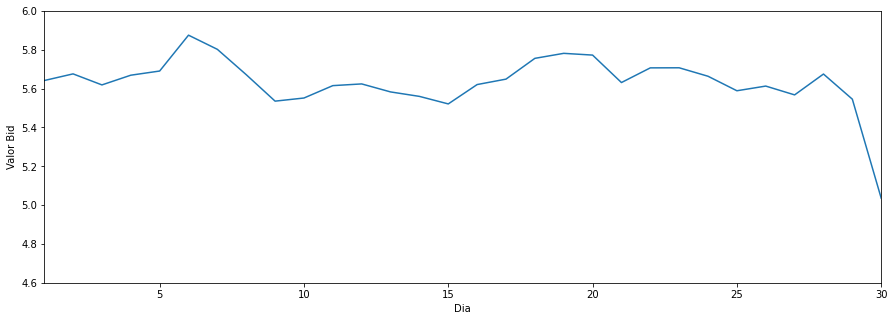

In [159]:
plt.figure(figsize=(15,5))
plt.plot(tabela_bid_df['Bid'])
plt.axis([1,30,4.6,6.0])
plt.ylabel('Valor Bid')
plt.xlabel('Dia')

plt.show()


# Pegando a cotação do BID dentro de 1 ano e passando para um dicionário

In [149]:
cotacao_bid_data_dict = cotacao_por_data()

In [154]:
lista_bid_data = []
for bid in cotacao_bid_data_dict:
    lista_bid_data.append(float(bid['bid']))
lista_bid_data.reverse()

In [156]:
print(lista_bid_data)

[5.6825, 5.6826, 5.6861, 5.6861, 5.6806, 5.668, 5.6876, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6884, 5.6845, 5.6826, 5.7126, 5.745, 5.745, 5.7406, 5.736, 5.7246, 5.7378, 5.7366, 5.741, 5.743, 5.7466, 5.7451, 5.7413, 5.7413, 5.7413, 5.7413, 5.743, 5.7427, 5.7427, 5.7427, 5.7398, 5.6976, 5.6608, 5.6593, 5.6549, 5.6561, 5.6631, 5.6694, 5.675, 5.667, 5.6374, 5.6361, 5.6337, 5.6348, 5.6249, 5.6217, 5.6391, 5.6386, 5.6398, 5.6386, 5.6281, 5.6279, 5.6333, 5.6351, 5.6909, 5.693, 5.7032, 5.6939, 5.563, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.571, 5.5703, 5.5663, 5.5692, 5.6532, 5.6766, 5.6766, 5.6674, 5.6933, 5.684, 5.677, 5.677, 5.677, 5.677, 5.677, 5.677, 5.677, 5.677, 5.677, 5.677, 5.677, 5.677, 5.677, 

# Mostrando em um gráfico os valores do BID em 1 ano

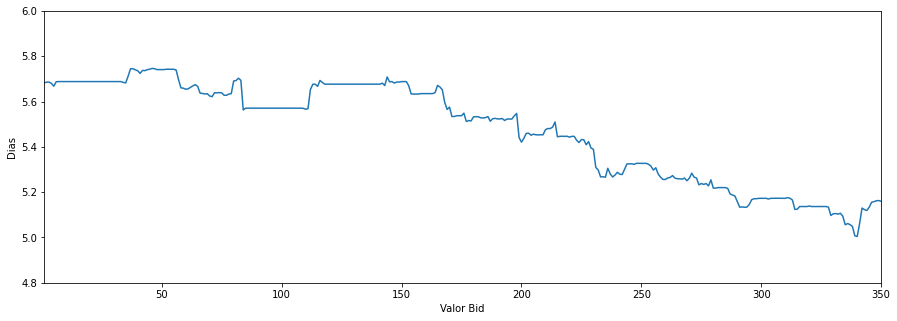

In [157]:
plt.figure(figsize=(15,5))
plt.plot(lista_bid_data)
plt.xlabel('Valor Bid')
plt.ylabel('Dias')
plt.axis([1,350,4.8,6.0])
plt.show()

# Legendas
## Bid = Compra
## Ask = Venda
## VarBid = Variação
## pctChange = Porcentagem de Variação
## High = Maximo
## Low = Mínimo